<a href="https://colab.research.google.com/github/olivercase/EC3365/blob/main/Cross_Sectional_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Read the Dataset

In [ ]:
url2 = 'https://raw.githubusercontent.com/mjonuzaj/EC3365/main/bek-data.txt'

df = pd.read_csv(url2, delimiter='\t', header=None)

In [ ]:
df.head()

In [ ]:
df.columns = ['Year', 'Firm', 'lsales', 'lk', 'lemp', 'skl', 'lm', 'foreign', 'exporter', 'intagibles', 'state', 'latitude', 'longitude']

In [ ]:
# keep the data for year 2005
df_new = df.loc[df['Year'] == 2005]

In [ ]:
df_new.head()

# Data Analysis

In [ ]:
numeric_columns = ['lsales', 'lk', 'lemp', 'skl']
df_numeric = df_new[numeric_columns]

correlation_matrix = df_numeric.corr()
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_new, x='lk', y='lsales', hue='exporter', marker='o')
plt.ylim(3,17)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_new, x='lemp', y='lsales', hue='exporter', marker='o')
plt.ylim(3,17)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_new, x='state', y='lsales')
plt.show()

In [ ]:
df_new['llp'] = df_new['lsales'] - df_new['lemp']

In [ ]:
sns.boxplot(data=df_new, x='exporter', y='llp')
plt.show()

# Regression Analysis

Our model will have the form:

$y_{i} = \beta_{0} + \beta_{1} k_{i} + \beta_{2} l_{i} + \beta_{3} m_{i} + e_{i}$

In [ ]:
df_new.head()

In [ ]:
Y = df_new['lsales']
X = df_new[['lk','lemp','lm']]
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(Y,X).fit()
print(model.summary())

# Total Factor Productivity

Total factor Productivity can be obtained as:

$\omega_{i} = y_{i} - \hat{\beta_{1}} k_{i} - \hat{\beta}_{2} l_{i} - \hat{\beta}**_**{3} m_{i}$

In [ ]:
tfp = Y - model.params.values[1] * X['lk'] + model.params.values[2] * X['lemp'] + model.params.values[3] * X['lm']

In [ ]:
df_new['tfp'] = tfp

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(tfp, bins=100, edgecolor='grey', density=True)
sns.kdeplot(data=df_new, x='tfp',color='red')
plt.xlabel('TFP in Natural Logarithm')
plt.show()

In [ ]:
df_2 = df_new[['tfp','lemp', 'lk']]

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.regplot(x=df_2['lemp'], y=df_2['tfp'],line_kws={"color": "red"}, scatter_kws={"color": "blue", "s": 10, "alpha": 0.5})
plt.title('TFP vs Labour')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.regplot(x=df_2['lk'], y=df_2['tfp'],line_kws={"color": "red"}, scatter_kws={"color": "blue", "s": 10, "alpha": 0.5})
plt.title('TFP vs Capital')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df_new, x ='state', y='tfp',color='orange')

plt.show()

# Determinants of TFP

In [ ]:
Y = df_new['tfp']

X = df_new[['state']]
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_new, x ='skl', y='tfp', s=10, alpha=0.5)
plt.show()

In [ ]:
Y = df_new['tfp']

X = df_new[['state', 'exporter', 'skl', 'lemp', 'lk']]
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

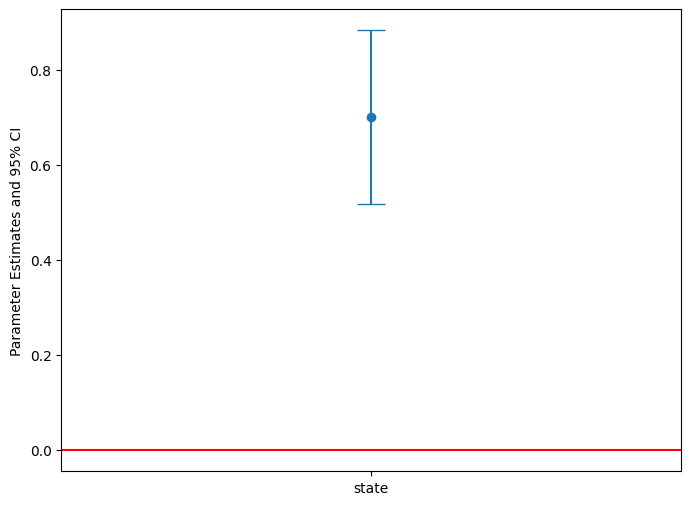

In [ ]:
thetas = model.params.values[1:]
ses = model.bse.values[1:]
names = model.params.index[1:]

plt.figure(figsize=(8,6))
plt.errorbar(x=names, y=thetas, yerr= 1.96 * ses, fmt='o', capsize=10)
plt.axhline(y=0, color='red')
plt.ylabel('Parameter Estimates and 95% CI')
plt.show()